In [1]:
# Load the 'Employee Productivity and Satisfaction HR Data' dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Employee = pd.read_csv('hr_dashboard_data.csv')

In [9]:
Employee.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [2]:
#number of employees in unique positions
total = Employee['Position'].value_counts().reset_index()
total.columns=['Position','Count']

total

,Position,Count
0,Manager,40
1,Junior Developer,35
2,Analyst,33
3,Team Lead,32
4,Intern,30
5,Senior Developer,30


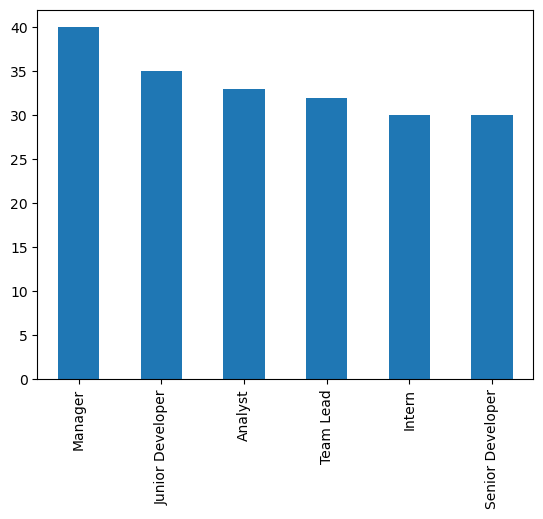

In [3]:
position_counts = Employee['Position'].value_counts()
position_counts.plot(kind='bar');

In [12]:
count_Pos = Employee['Position'].value_counts().reset_index()
count_Pos.columns=['Position','Number']
count_Pos

,Position,Number
0,Manager,40
1,Junior Developer,35
2,Analyst,33
3,Team Lead,32
4,Intern,30
5,Senior Developer,30


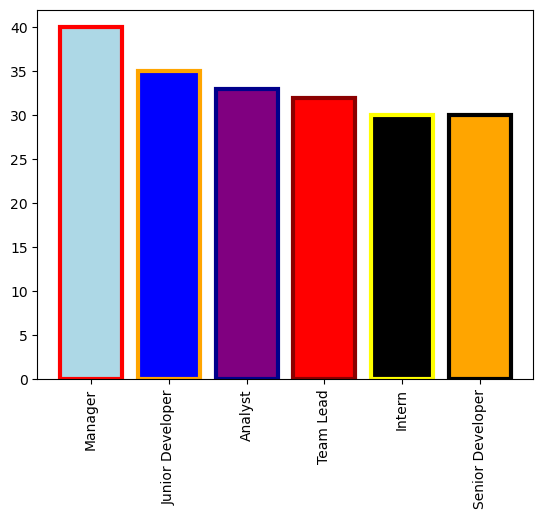

In [13]:
color = ['lightblue', 'blue', 'purple', 'red', 'black', 'orange']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow', 'black']
fig, ax = plt.subplots()
ax.bar(count_Pos['Position'], count_Pos['Number'],
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xticks(rotation=90)

# Show graph
plt.show()

In [4]:
#Distribution of avg salary for different positons 
df = Employee.groupby(['Position'])[['Salary']].mean().reset_index()
df

,Position,Salary
0,Analyst,68195.696970
1,Intern,34811.500000
2,Junior Developer,52104.114286
3,Manager,110091.475000
4,Senior Developer,86481.500000
5,Team Lead,100228.062500


<AxesSubplot:title={'center':'Average Salary by Position'}, xlabel='Position'>

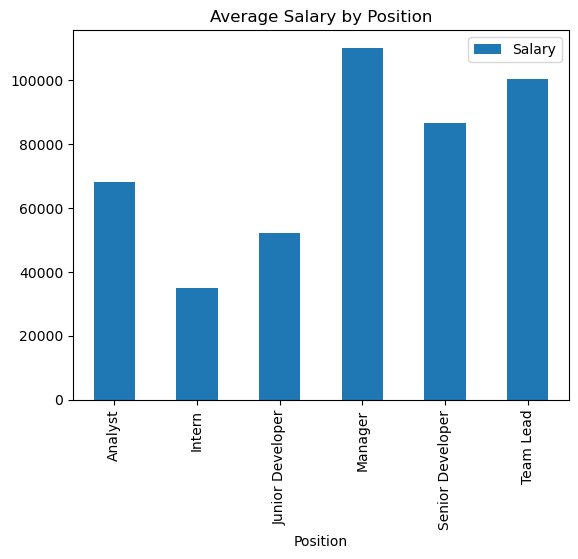

In [5]:
df.plot.bar(x='Position', y='Salary', title = 'Average Salary by Position')

In [35]:
# Average Productivity and Satisfaction rate by Position
avg_by_post = Employee.groupby('Position')[['Productivity (%)', 'Satisfaction Rate (%)', 'Projects Completed']].mean().reset_index()
avg_by_post

,Position,Productivity (%),Satisfaction Rate (%),Projects Completed
0,Analyst,44.545455,39.787879,9.393939
1,Intern,41.333333,55.266667,2.700000
2,Junior Developer,52.314286,54.057143,6.771429
3,Manager,48.675000,55.575000,19.975000
4,Senior Developer,50.233333,50.400000,12.833333
5,Team Lead,42.375000,43.406250,14.968750


<AxesSubplot:title={'center':'Average Productivity and Satisfaction Rate by Position'}, xlabel='Position'>

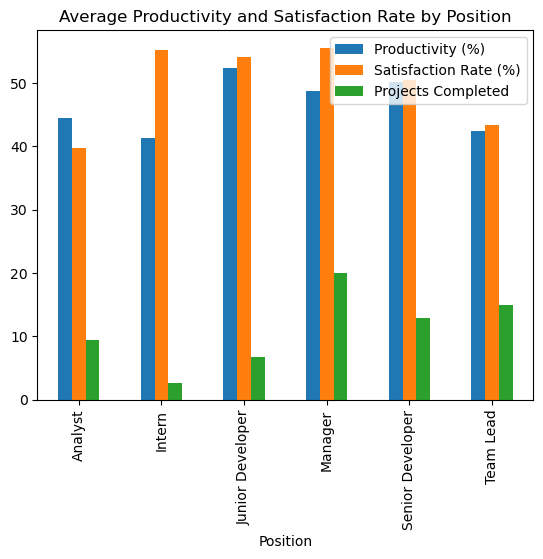

In [33]:
avg_by_post.plot.bar(x='Position', y=['Productivity (%)', 'Satisfaction Rate (%)', 'Projects Completed'], 
                     title='Average Productivity and Satisfaction Rate by Position') 

In [30]:
# Maximum Projects Completed by Position
maxbypost = Employee.groupby('Position')[['Projects Completed']].max().reset_index()
maxbypost

,Position,Projects Completed
0,Analyst,15
1,Intern,5
2,Junior Developer,10
3,Manager,25
4,Senior Developer,18
5,Team Lead,20


<AxesSubplot:title={'center':'Maximum Projects Completed by Position'}, xlabel='Position'>

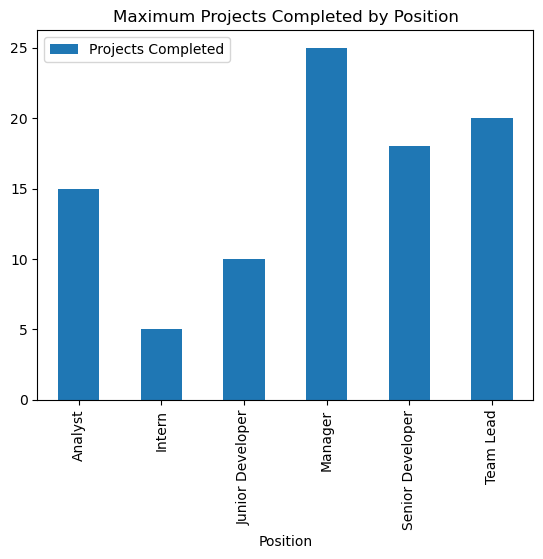

In [31]:
maxbypost.plot.bar(x='Position', y=['Projects Completed'], 
                     title='Maximum Projects Completed by Position') 

In [36]:
# Avg Feedback Score by Position
Feedbackbypost = Employee.groupby('Position')[['Feedback Score']].mean().reset_index()
Feedbackbypost

,Position,Feedback Score
0,Analyst,2.766667
1,Intern,2.953333
2,Junior Developer,2.848571
3,Manager,3.022500
4,Senior Developer,2.633333
5,Team Lead,3.034375


<AxesSubplot:title={'center':'Avg Feedback Score by Position'}, xlabel='Position'>

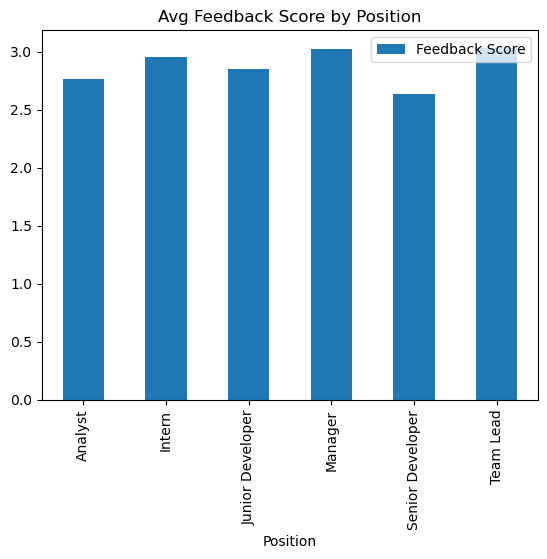

In [39]:
Feedbackbypost.plot.bar(x='Position', y=['Feedback Score'], 
                     title='Avg Feedback Score by Position') 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Check the first few rows to verify column names
print(df.head())
# Optional: Set a scale factor for bubble sizes if productivity values are small.
scale_factor = 100  # Adjust this value as needed
plt.figure(figsize=(10, 6))
plt.scatter(df['Salary'], df['Age'], s=df['Productivity (%)'] * scale_factor, alpha=0.6, edgecolors='w')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Employee Bubble Plot: Salary vs. Age (Bubble size = Productivity)')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset (update the file path if needed)
# df = pd.read_csv('employee_data.csv')
# Check the first few rows to verify column names
print(df.head())
# Get unique positions and create a color map
positions = df['Position'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(positions)))
# Optional: Set a scale factor for bubble sizes if productivity values are small.
scale_factor = 100  # Adjust this value as needed
plt.figure(figsize=(10, 6))
# Plot each position group with its own color
for pos, col in zip(positions, colors):
    subset = df[df['Position'] == pos]
    plt.scatter(subset['Salary'], subset['Age'],
                s=subset['Productivity (%)'] * scale_factor,
                alpha=0.6, edgecolors='w', label=pos, color=col)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Employee Bubble Plot: Salary vs Age by Position (Bubble size = Productivity)')
plt.legend(title='Position')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset (update the file path if needed)
# df = pd.read_csv('employee_data.csv')
# Group by 'Position' and calculate mean values for Salary, Age, and Productivity
agg_df = df.groupby('Position').agg({
    'Salary': 'mean',
    'Age': 'mean',
    'Productivity (%)': 'mean'
}).reset_index()
# Optional: Set a scale factor for bubble sizes (adjust as needed)
scale_factor = 100
plt.figure(figsize=(10, 6))
plt.scatter(agg_df['Salary'], agg_df['Age'],
            s=agg_df['Productivity (%)'] * scale_factor,
            alpha=0.6, edgecolors='w')
# Add text labels for each position
for i, row in agg_df.iterrows():
    plt.text(row['Salary'], row['Age'], row['Position'],
             ha='center', va='center', fontsize=9)
# Calculate the axis limits with extra padding
x_min, x_max = agg_df['Salary'].min(), agg_df['Salary'].max()
y_min, y_max = agg_df['Age'].min(), agg_df['Age'].max()
# Adding 15% padding to the ranges
padding_x = (x_max - x_min) * 0.15
padding_y = (y_max - y_min) * 0.15
plt.xlim(x_min - padding_x, x_max + padding_x)
plt.ylim(y_min - padding_y, y_max + padding_y)
plt.xlabel('Average Salary')
plt.ylabel('Average Age')
plt.title('Bubble Plot: Average Salary vs. Average Age by Position\n(Bubble size = Average Productivity)')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset (update the file path if needed)
# df = pd.read_csv('employee_data.csv')
# Group by 'Position' and calculate mean values for Age, Productivity, and Salary
agg_df = df.groupby('Position').agg({
    'Age': 'mean',
    'Productivity (%)': 'mean',
    'Salary': 'mean'
}).reset_index()
# Optional: Set a scale factor for bubble sizes (adjust as needed)
scale_factor = 0.1  # Adjust based on the magnitude of Salary values
plt.figure(figsize=(10, 6))
plt.scatter(agg_df['Age'], agg_df['Productivity (%)'],
            s=agg_df['Salary'] * scale_factor,
            alpha=0.6, edgecolors='w')
# Add text labels for each position
for i, row in agg_df.iterrows():
    plt.text(row['Age'], row['Productivity (%)'], row['Position'],
             ha='center', va='center', fontsize=9)
# Calculate axis limits with extra padding to ensure bubbles are not cut off
x_min, x_max = agg_df['Age'].min(), agg_df['Age'].max()
y_min, y_max = agg_df['Productivity (%)'].min(), agg_df['Productivity (%)'].max()
padding_x = (x_max - x_min) * 0.15
padding_y = (y_max - y_min) * 0.15
plt.xlim(x_min - padding_x, x_max + padding_x)
plt.ylim(y_min - padding_y, y_max + padding_y)
plt.xlabel('Average Age')
plt.ylabel('Average Productivity')
plt.title('Bubble Plot: Avg Productivity vs. Avg Age by Position\n(Bubble size = Avg Salary)')
plt.grid(True)
# Create a custom legend for bubble sizes representing average salary
# Here we pick three representative salary values: min, median, and max.
salary_min = agg_df['Salary'].min()
salary_median = agg_df['Salary'].median()
salary_max = agg_df['Salary'].max()
legend_salaries = [salary_min, salary_median, salary_max]
handles = []
for s in legend_salaries:
    handles.append(plt.scatter([], [], s=s * scale_factor, color='gray',
                                alpha=0.6, edgecolors='w', label=f'Salary: {s:.0f}'))
plt.legend(handles=handles, scatterpoints=1, title="Average Salary",
           loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

NameError: name 'df' is not defined